In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rugby_prediction.constants import DATA_FOLDER
from rugby_prediction.preprocessing import (
    transform_raw_data_to_team_level,
    create_rolling_average,
    drop_nill_draws
)


# Baseline Setting

The purpose of this notebook is to create some baseline scores to beat for a model, to know what kind of score we should be aiming to beat. The baselines I'm planning on using are:
* A completely random baseline
* A rule based baseline
* A simple ML based approach

In [2]:
raw_data_filepath = DATA_FOLDER.joinpath('match_data.csv')

raw_df = pd.read_csv(raw_data_filepath)
raw_df.head()


,match_id,unique_id,match_date,venue,city,state,neutral_site,indoor,team_1_id,team_1_name,...,team_1_score,team_1_winner,team_2_id,team_2_name,team_2_abbreviation,team_2_home_away,team_2_score,team_2_winner,competition,season
0,24843,s:300~l:8323~e:24843~c:24843,2005-02-05T14:00Z,Stade de France,Saint-Denis,Reunion,False,False,9,France,...,16,True,2,Scotland,SCOT,away,9,False,Six Nations,2005
1,24844,s:300~l:8323~e:24844~c:24844,2005-02-05T17:30Z,Principality Stadium,Cardiff,Wales,False,False,4,Wales,...,11,True,1,England,ENG,away,9,False,Six Nations,2005
2,128030,s:300~l:8007~e:128030~c:128030,2005-02-05T14:00Z,Twickenham Stoop,London,England,False,False,25901,Harlequins,...,38,True,25900,Gloucester Rugby,GLOUC,away,9,False,Gallagher Premiership,2005
3,128028,s:300~l:8007~e:128028~c:128028,2005-02-05T15:00Z,cinch Stadium at Franklin's Gardens,Northampton,England,False,False,25907,Northampton Saints,...,20,False,25909,Saracens,SARAC,away,21,True,Gallagher Premiership,2005
4,128029,s:300~l:8007~e:128029~c:128029,2005-02-05T19:45Z,Recreation Ground,Bath,England,False,False,25898,Bath Rugby,...,6,False,25903,Leicester Tigers,LEICS,away,6,False,Gallagher Premiership,2005


In [3]:
raw_df = drop_nill_draws(raw_df)

In [4]:
transformed_df = transform_raw_data_to_team_level(raw_df)
transformed_df.head()


,match_id,unique_id,match_date,venue,city,state,neutral_site,indoor,competition,season,id,home_away,score,winner,id_opposition,home_away_opposition,score_opposition,winner_opposition
0,24843,s:300~l:8323~e:24843~c:24843,2005-02-05T14:00Z,Stade de France,Saint-Denis,Reunion,False,False,Six Nations,2005,9,home,16,True,2,away,9,False
1,24843,s:300~l:8323~e:24843~c:24843,2005-02-05T14:00Z,Stade de France,Saint-Denis,Reunion,False,False,Six Nations,2005,2,away,9,False,9,home,16,True
2,24844,s:300~l:8323~e:24844~c:24844,2005-02-05T17:30Z,Principality Stadium,Cardiff,Wales,False,False,Six Nations,2005,4,home,11,True,1,away,9,False
3,24844,s:300~l:8323~e:24844~c:24844,2005-02-05T17:30Z,Principality Stadium,Cardiff,Wales,False,False,Six Nations,2005,1,away,9,False,4,home,11,True
4,128030,s:300~l:8007~e:128030~c:128030,2005-02-05T14:00Z,Twickenham Stoop,London,England,False,False,Gallagher Premiership,2005,25901,home,38,True,25900,away,9,False


In [5]:
transformed_df.groupby(['unique_id']).count().tail()


,match_id,match_date,venue,city,state,neutral_site,indoor,competition,season,id,home_away,score,winner,id_opposition,home_away_opposition,score_opposition,winner_opposition
unique_id,,,,,,,,,,,,,,,,,
s:300~l:8337~e:93501~c:93501,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
s:300~l:8337~e:93502~c:93502,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
s:300~l:8337~e:93503~c:93503,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
s:300~l:8337~e:93504~c:93504,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
s:300~l:8337~e:93505~c:93505,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [6]:
columns_to_keep = [
    'match_id',
    'unique_id',
    'match_date',
    'venue',
    'city',
    'state',
    'neutral_site',
    'indoor',
    'competition',
    'season',
    'id',
    'home_away',
    'score',
    'id_opposition',
    'score_opposition',
]
df = transformed_df[columns_to_keep].copy()
df.head()


,match_id,unique_id,match_date,venue,city,state,neutral_site,indoor,competition,season,id,home_away,score,id_opposition,score_opposition
0,24843,s:300~l:8323~e:24843~c:24843,2005-02-05T14:00Z,Stade de France,Saint-Denis,Reunion,False,False,Six Nations,2005,9,home,16,2,9
1,24843,s:300~l:8323~e:24843~c:24843,2005-02-05T14:00Z,Stade de France,Saint-Denis,Reunion,False,False,Six Nations,2005,2,away,9,9,16
2,24844,s:300~l:8323~e:24844~c:24844,2005-02-05T17:30Z,Principality Stadium,Cardiff,Wales,False,False,Six Nations,2005,4,home,11,1,9
3,24844,s:300~l:8323~e:24844~c:24844,2005-02-05T17:30Z,Principality Stadium,Cardiff,Wales,False,False,Six Nations,2005,1,away,9,4,11
4,128030,s:300~l:8007~e:128030~c:128030,2005-02-05T14:00Z,Twickenham Stoop,London,England,False,False,Gallagher Premiership,2005,25901,home,38,25900,9


## Random Baseline

Find the distribution of team scores, and pick a random number from that.

In [7]:
df['score'].describe()


count    30890.000000
mean        23.366106
std         13.247719
min          0.000000
25%         14.000000
50%         21.000000
75%         30.000000
max        132.000000
Name: score, dtype: float64

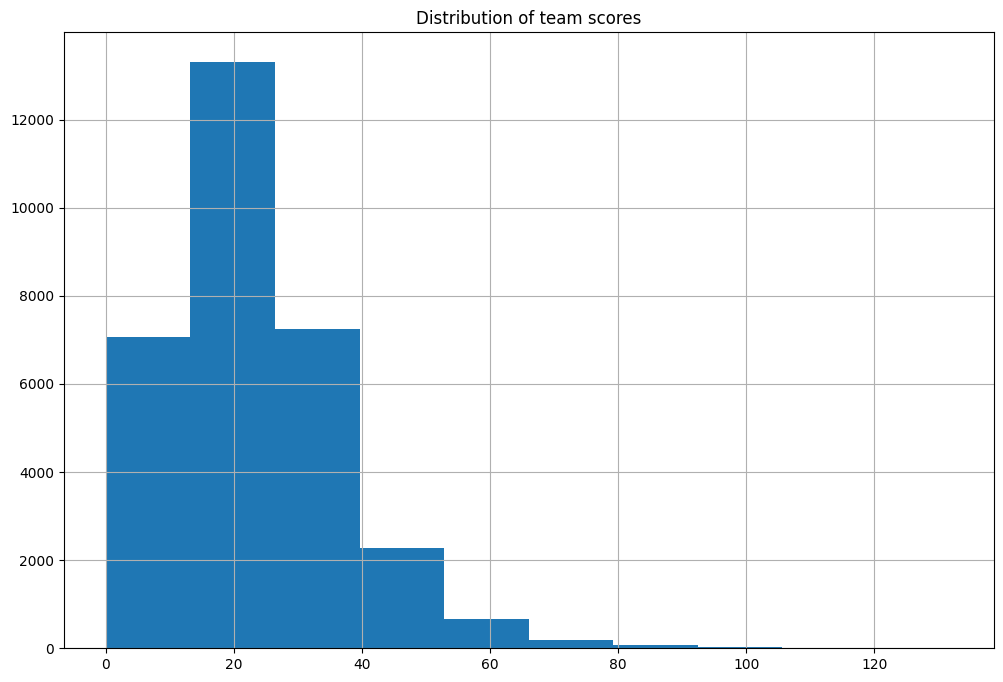

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

df['score'].hist(ax=ax)
ax.set(title='Distribution of team scores')

plt.show()


Not a normal distribution, but I'll approximate it as one. This is only a baseline after all.

In [9]:
# set seed for reproducibility
np.random.seed(42)

random_predictions = np.random.normal(
    df['score'].mean(), df['score'].std(), len(df)
)


In [13]:
from sklearn.metrics import mean_absolute_error

random_mae = mean_absolute_error(df['score'], random_predictions)
random_mae


14.661669659603934

## Rule Based

Take the average of their last 5 scores as the score expected in this game. Will impute missing results with the median score overall.

In [11]:
rolling_average_df = create_rolling_average(df, 'score')

In [14]:
rule_based_mae = mean_absolute_error(rolling_average_df['score'], rolling_average_df['rolling_5_score'])
rule_based_mae

10.252334088701845

So, a slight improvement on the random predictor, but still room for improvement.

## Simple ML

For my last baseline, I'll use a simple machine learning algorithm (linear regression) to predict the score of a team in a given match. I'll do this on a test set of 20% of the original data, with the model trained on the original 80%.


In [15]:
# some quick feature engineering
rolling_average_df['home'] = np.where(rolling_average_df['home_away'] == 'home', True, False)
rolling_average_df['indoor'] = rolling_average_df['indoor'].fillna(False)

In [16]:
feature_list = ['neutral_site', 'indoor', 'home', 'rolling_5_score']
X = rolling_average_df[feature_list]
y = rolling_average_df['score']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mae


9.355663118873512

So, another small improvement, but still a MAE of 9.36. This was a very basic feature set, and I can build this out in future iterations.